# Numpy

Материалы:
* Макрушин С.В. "Лекция 1: Библиотека Numpy"
* https://numpy.org/doc/stable/user/index.html
* https://numpy.org/doc/stable/reference/index.html

## Задачи для совместного разбора

1. Сгенерировать двухмерный массив `arr` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в диапазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида  $𝑎𝑥+𝑏$  так, что после нормализации максимальный элемент масcива будет равен 1.0, минимальный 0.0

In [2]:
import numpy as np

In [3]:
np.random.randint(0, 20, size = (4, 7))

array([[19,  8,  9, 16, 17,  8,  8],
       [15, 16, 18,  7,  6,  5,  0],
       [14,  0, 13, 13, 14,  2, 16],
       [ 1,  2,  8,  6,  2, 11, 18]])

2. Создать матрицу 8 на 10 из случайных целых (используя модуль `numpy.random`) чисел из диапозона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [77]:
matrix = np.random.randint(0, 10, size = (8, 10))
print(matrix)

lst = list(np.sum(matrix, axis = 1))
print(f'индекс строки - {lst.index(np.min(lst))}')
print(f'строка - {matrix[lst.index(np.min(lst))]}')

[[0 1 7 6 0 3 2 4 0 8]
 [2 7 9 1 7 2 2 8 6 0]
 [3 8 6 2 1 9 1 5 0 8]
 [2 7 9 1 1 2 2 0 0 5]
 [1 2 4 3 9 4 8 3 7 7]
 [5 3 2 7 6 9 8 5 5 8]
 [4 4 1 5 5 3 1 5 0 1]
 [8 5 5 6 9 6 4 6 8 3]]
индекс строки - 3
строка - [2 7 9 1 1 2 2 0 0 5]


3. Найти евклидово расстояние между двумя одномерными векторами одинаковой размерности.

In [79]:
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D
import math

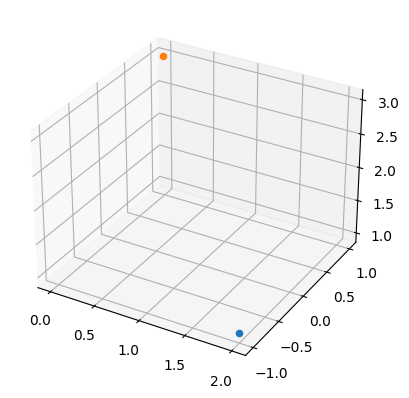

3.4641016151377544


In [80]:
fig = pl.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(2, -1, 1)
ax.scatter(0, 1, 3)
pl.show()

point_1 = np.array((2, -1, 1))
point_2 = np.array((0, 1, 3))

distance = math.dist(point_1, point_2)
print(distance)

4. Решить матричное уравнение `A*X*B=-C` - найти матрицу `X`. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

In [86]:
A = np.array([[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]])
B = np.array([[3, -1], [2, 1]])
C = np.array([[7, 21], [11, 8], [8, 4]])
A1 = np.linalg.inv(A)
B1 = np.linalg.inv(B)
C1 = -1*C
mult = np.dot(A1,C1)
X = np.dot(mult,B1)
print(X)

[[ 1.00000000e+00  5.32907052e-16]
 [-2.00000000e+00  1.00000000e+00]
 [ 3.00000000e+00 -4.00000000e+00]]


## Лабораторная работа №1

Замечание: при решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использования функционала библиотеки `numpy`.

1. Файл `minutes_n_ingredients.csv` содержит информацию об идентификаторе рецепта, времени его выполнения в минутах и количестве необходимых ингредиентов. Считайте данные из этого файла в виде массива `numpy` типа `int32`, используя `np.loadtxt`. Выведите на экран первые 5 строк массива.

In [20]:
import numpy as np
data = np.loadtxt("minutes_n_ingredients.csv", delimiter=',', dtype=np.int32, skiprows=1)
data

array([[127244,     60,     16],
       [ 23891,     25,      7],
       [ 94746,     10,      6],
       ...,
       [498432,     65,     15],
       [370915,      5,      4],
       [ 81993,    140,     14]])

2. Вычислите среднее значение, минимум, максимум и медиану по каждому из столбцов, кроме первого.

In [21]:
print('1 столбец')
print(f'Среднее значение: {np.mean(data[:, 1])}')
print(f'Минимум: {np.min(data[:, 1])}')
print(f'Максимум: {np.max(data[:, 1])}')
print(f'Медиана: {np.median(data[:, 1])}')
print()
print('2 столбец')
print(f'Среднее значение: {np.mean(data[:, 2])}')
print(f'Минимум: {np.min(data[:, 2])}')
print(f'Максимум: {np.max(data[:, 2])}')
print(f'Медиана: {np.median(data[:, 2])}')

1 столбец
Среднее значение: 21601.00169
Минимум: 0
Максимум: 2147483647
Медиана: 40.0

2 столбец
Среднее значение: 9.05528
Минимум: 1
Максимум: 39
Медиана: 9.0


3. Ограничьте сверху значения продолжительности выполнения рецепта значением квантиля $q_{0.75}$. 

In [22]:
data[:, 1] = np.clip(data[:, 1], 0, np.quantile(data[:, 1], 0.75))
data

array([[127244,     60,     16],
       [ 23891,     25,      7],
       [ 94746,     10,      6],
       ...,
       [498432,     65,     15],
       [370915,      5,      4],
       [ 81993,     65,     14]])

4. Посчитайте, для скольких рецептов указана продолжительность, равная нулю. Замените для таких строк значение в данном столбце на 1.

In [23]:
print(f"До замены: {np.count_nonzero(data[:, 1] == 0)}")
data[:,1][data[:,1] == 0] = 1
print(f"После замены: {np.count_nonzero(data[:, 1] == 0)}")

До замены: 479
После замены: 0


5. Посчитайте, сколько уникальных рецептов находится в датасете.

In [24]:
len(np.unique(data[:,0]))

100000

6. Сколько и каких различных значений кол-ва ингредиентов присутвует в рецептах из датасета?

In [25]:
print(len(np.unique(data[:,2])))
print(*np.unique(data[:,2]))

37
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 37 39


7. Создайте версию массива, содержащую информацию только о рецептах, состоящих не более чем из 5 ингредиентов.

In [26]:
data_new = data
ing = (data[:, 2] <= 5)
data_new[ing, :]

array([[446597,     15,      5],
       [204134,      5,      3],
       [ 25623,      6,      4],
       ...,
       [ 52088,     60,      5],
       [128811,     15,      4],
       [370915,      5,      4]])

8. Для каждого рецепта посчитайте, сколько в среднем ингредиентов приходится на одну минуту рецепта. Найдите максимальное значение этой величины для всего датасета

In [27]:
ing_min = []
for row in data:
    ing_min.append(row[2] / row[1])
print(max(ing_min))

24.0


9. Вычислите среднее количество ингредиентов для топ-100 рецептов с наибольшей продолжительностью

In [28]:
np.mean(data[np.argsort(data[:,1])][::-1][:100][:,2])

9.96

10. Выберите случайным образом и выведите информацию о 10 различных рецептах

In [29]:
random_inform = np.random.choice(len(data), size=10, replace=False)
row = data[random_inform, :]
print(row)

[[ 14852     35     16]
 [437942     50      5]
 [104698     50      4]
 [284591     50      5]
 [157053     15     11]
 [ 32545     60     19]
 [270028     65     13]
 [106214     40      8]
 [ 14782      2      5]
 [180802     15      9]]


11. Выведите процент рецептов, кол-во ингредиентов в которых меньше среднего.

In [30]:
less_av = (data[:, 2] <= np.mean(data[:,2]))
len(data[less_av, :])/len(data)*100

58.802

12. Назовем "простым" такой рецепт, длительность выполнения которого не больше 20 минут и кол-во ингредиентов в котором не больше 5. Создайте версию датасета с дополнительным столбцом, значениями которого являются 1, если рецепт простой, и 0 в противном случае.

In [31]:
data2 = data.copy()
prost = [1 if (row[1] <= 20) & (row[2] <= 5) else 0 for row in data2]
new_data = np.insert(data2, 3, prost, axis=1)
print(new_data)

[[127244     60     16      0]
 [ 23891     25      7      0]
 [ 94746     10      6      0]
 ...
 [498432     65     15      0]
 [370915      5      4      1]
 [ 81993     65     14      0]]


13. Выведите процент "простых" рецептов в датасете

In [32]:
cnt_prst = (new_data[:,3] == 1)
len(data[cnt_prst, :])/len(new_data)*100

9.552

14. Разделим рецепты на группы по следующему правилу. Назовем рецепты короткими, если их продолжительность составляет менее 10 минут; стандартными, если их продолжительность составляет более 10, но менее 20 минут; и длинными, если их продолжительность составляет не менее 20 минут. Создайте трехмерный массив, где нулевая ось отвечает за номер группы (короткий, стандартный или длинный рецепт), первая ось - за сам рецепт и вторая ось - за характеристики рецепта. Выберите максимальное количество рецептов из каждой группы таким образом, чтобы было возможно сформировать трехмерный массив. Выведите форму полученного массива.